# Section 5.6
# Superposition in space, land strip sudden change same at both ends

IHE, Delft, transient groundwater

@T.N.Olsthoorn, 2019-01-02

## Context

The 1D aquifer has a limited width equal to $L$. The head at $x=0$ changes suddenly at $t=0$ by the value $a$, while the head at $x=L$ remains fixed.

The solution for an infinite aquifer with sudden head change at $x=0$ reads

$$ s(x, t) = s(x, 0) \, \mathtt{erfc} \left(\sqrt{\frac {x^2 S} {4 kD t}} \right) $$

In this case the head change at $t=0$ is at both ends of the strip and equal to $a$.

For convenience and symmetry we choose $x=0$ in the center of the strip. So the left is $x=-L/2$ and the right it is $x=+L/2$.

Compensating sudden head change at the left side requires mirror changes equal to $-a$ at $x = \pm (2 i - \frac 1 2) L$ atarting at $i=0$ and mirror changes equal to $-a$ at $x = \pm (2 i - \frac 1 2) L $ starting at $i=1$.

This superposition can, therefore, be written as

$$ s(x, t) = a \left[ \sum _0 ^\infty \left\{
 \mathtt{erfc} \left(((2 i + \frac 1 2) L + x) \sqrt{ \frac S {4 kD t} } \right)
+
\mathtt{erfc} \left(((2 i + \frac 1 2) L - x) \sqrt{\frac S {4 kD t}} \right) 
\right\}
-
 \sum_1 ^\infty \left\{
\mathtt{erfc} \left(((2 i - \frac 1 2) L - x) \sqrt{\frac S {4 kD t}} \right)
+
\mathtt{erfc} \left(((2 i - \frac 1 2) L + x) \sqrt{\frac S {4 kD t}} \right)
\right\} \right] $$

## Second solution, decay of a mound in a strip

A second solution, which shows the deline of the head in a strip due to bleeding to the fixed heads at both ends.

$$ s(x, t) = A \frac 4 \pi \sum _{j=1} ^\infty \left\{
\frac {(-1)^{j-1}} {2 j - 1}
\cos \left[(2 j -1) \frac \pi 2 \frac x b \right]
\exp \left[ -(2 j - 1)^2  \left( \frac \pi 2 \right)^2 \frac {kD} {b^2 S} t \right]
\right\} $$

To make sure that both reflex decay of an initial head of $a$ above the fixed heads at $x \pm L/2 = b$, we have to subtract the sudden head solutions from the initial head $a$

## Loading modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

## Convenience function for setting up a graph

In [2]:
def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
                   xscale='linear', yscale='linear', size_inches=(14, 8)):
    '''Setup a new axis for plotting'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.grid(True)
    return ax

## Super position with $\mathtt{erfc}()$ subtracted from initial head $a$

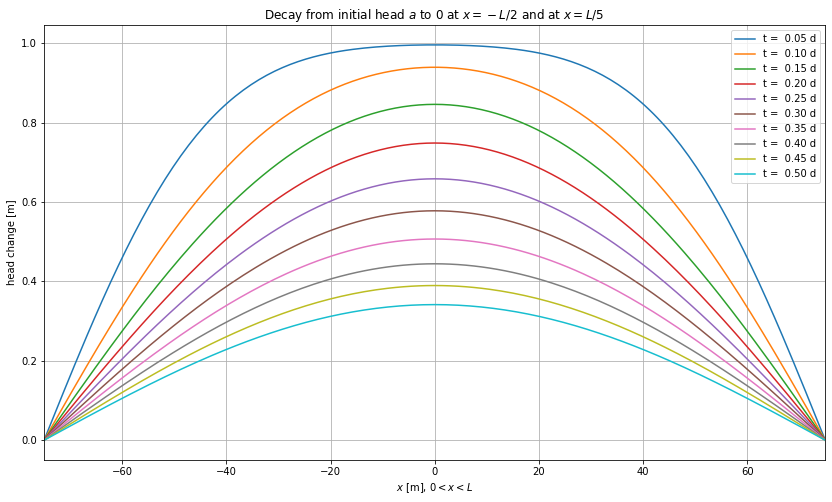

In [7]:
L = 150 # m (strip wirdth)
x = np.linspace(-L/2, L/2, 201) # points, taking left at zero.
kD = 600 # m2/d
S = 0.1 # [-]
a = 1.0 # m, sudden head change at x = -L/2
times = np.linspace(0, 0.5, 11)[1:] # d

ax = newfig('Decay from initial head $a$ to 0 at $x = -L/2$ and at $x = L/5$',
                '$x$ [m], $ 0 < x < L $', 'head change [m]', xlim=(-L/2, L/2))

for t in times:
    rt = np.sqrt(S / (4 * kD * t))
    s = np.zeros_like(x) + a # intiial head
    for i in range(20):
        s -= a * erfc(((2 * i + 0.5) * L + x) * rt)
        s -= a * erfc(((2 * i + 0.5) * L - x) * rt)
        if i > 0:
            s += a * erfc(((2 * i - 0.5) * L - x) * rt)
            s += a * erfc(((2 * i - 0.5) * L + x) * rt)
    ax.plot(x, s, label=f't = {t:5.2f} d')
ax.legend()


## Same, thing, now using the analytical solution with the cos and the exp

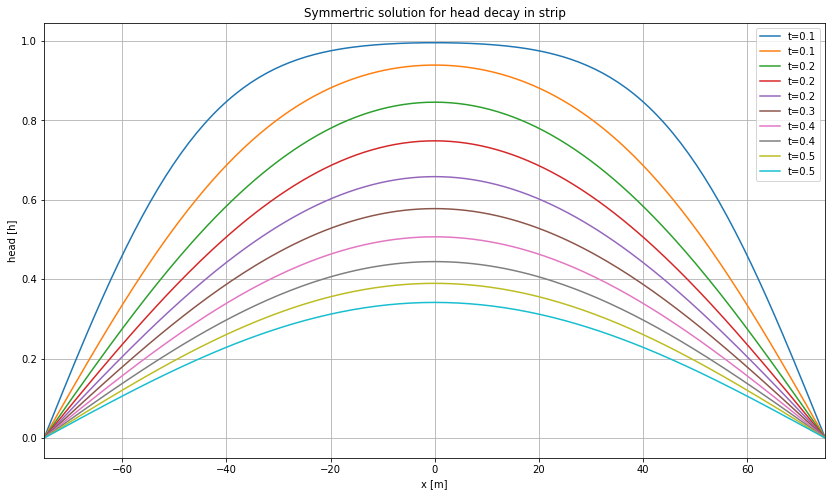

In [6]:
b =L/2

ax = newfig('Symmertric solution for head decay in strip', 'x [m]', 'head [h]', xlim=(-b, b))

for t in times:
    h = np.zeros_like(x)
    for j in range(1,20):
        h += a * 4  / np.pi * ((-1)**(j-1) / (2 * j - 1) *
            np.cos((2 * j - 1) * np.pi / 2 * x / b) *
            np.exp(- (2 * j - 1)**2 * (np.pi / 2)**2 * kD /(b**2 * S) * t))
    ax.plot(x, h, label=f't={t:.1f}')
    
ax.legend()

As can be seen from comparing the graphs, both solutions are the same. I is in fact easy to also compute the discharge to the ditches as a function of time.